# Titanic dataset

This assigment consists of the introductory problem [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). The goal is to train a classifier to predict persons that have survived the disaster. 

We will start by reading in the, by now standard, Titanic dataset. It contains information about passengers of the Titanic. The information includes i.a. sex, age, name  and passenger class as well as information if the passenger survived or died in the disaster. You can find more details about this data set [here](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf). 

The data  is in "coma separated values" (csv) format and to read it we will use the [pandas](https://pandas.pydata.org) library. Pandas  provides tools for manipulating  data frames and series and is wildly used in data science projects. 

Please note that this is NOT a pandas manual. For detailed explanation of the concepts and functions used here you should consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)
import pandas as pd

In [2]:
data_all = pd.read_csv("titanic3.csv")

`data_all` is a pandas  [_DataFrame_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) object. 

In [3]:
type(data_all)

pandas.core.frame.DataFrame

We can check what attributes are stored in the DataFrame by listing the column names:

In [4]:
data_all.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

or get a quick preview using ```head``` function: 

In [5]:
data_all.head(2)

Unnamed: 0  pclass  survived                            name     sex  \
0           0       1         1   Allen, Miss. Elisabeth Walton  female   
1           1       1         1  Allison, Master. Hudson Trevor    male   

       age  sibsp  parch  ticket      fare    cabin embarked boat  body  \
0  29.0000      0      0   24160  211.3375       B5        S    2   NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON

For the description of those features please see the before mentioned [link](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf). 

Another usefull function is ```info```:

In [6]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   int64  
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


As we can see not all attributes are known (non-null) for every passanger. This is a frequent situation in real datasets. 

In [7]:
data_all.survived.value_counts()/len(data_all)

0    0.618029
1    0.381971
Name: survived, dtype: float64

### Train/test split

As in every machine learning problem we should split our data into training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
seed = 5657
train_data, test_data = train_test_split(data_all, train_size=0.8, stratify=data_all.survived, random_state=seed)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 207 to 1206
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1047 non-null   int64  
 1   pclass      1047 non-null   int64  
 2   survived    1047 non-null   int64  
 3   name        1047 non-null   object 
 4   sex         1047 non-null   object 
 5   age         845 non-null    float64
 6   sibsp       1047 non-null   int64  
 7   parch       1047 non-null   int64  
 8   ticket      1047 non-null   object 
 9   fare        1046 non-null   float64
 10  cabin       242 non-null    object 
 11  embarked    1045 non-null   object 
 12  boat        389 non-null    object 
 13  body        92 non-null     float64
 14  home.dest   608 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 130.9+ KB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 650 to 853
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  262 non-null    int64  
 1   pclass      262 non-null    int64  
 2   survived    262 non-null    int64  
 3   name        262 non-null    object 
 4   sex         262 non-null    object 
 5   age         201 non-null    float64
 6   sibsp       262 non-null    int64  
 7   parch       262 non-null    int64  
 8   ticket      262 non-null    object 
 9   fare        262 non-null    float64
 10  cabin       53 non-null     object 
 11  embarked    262 non-null    object 
 12  boat        97 non-null     object 
 13  body        29 non-null     float64
 14  home.dest   137 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 32.8+ KB


In [12]:
train_data.survived.value_counts()/len(train_data)

0    0.617956
1    0.382044
Name: survived, dtype: float64

In [13]:
test_data.survived.value_counts()/len(test_data)

0    0.618321
1    0.381679
Name: survived, dtype: float64

## Problem 1

__a__) Implement a Bayes classifier for predicting passenger survival  using sex and pclass  features.

Actually this problem will be partially solved for you below to serve as an tutorial on pandas :) 

#### Preliminaries

We will start by extracting from the frame  only the information we need:

In [14]:
train_data = train_data[['pclass', 'sex', 'survived']]
test_data = test_data[['pclass', 'sex', 'survived']]

In [15]:
train_n_samples = len(train_data)
test_n_samples = len(test_data)

In [16]:
train_data.head(5)

pclass     sex  survived
207        1  female         1
363        2    male         0
966        3  female         0
1292       3    male         0
118        1    male         0

First we need to group passengers according to sex, class and survival status. This can be achieved using  the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function:

In [17]:
train_grouped = train_data.groupby(['survived','sex','pclass'])

We can count the number of passegers in each group using function ```size```:

In [18]:
train_counts = train_grouped.size()

Object ```train_counts``` contains all the information that we need to construct the classifier:

In [19]:
train_counts

survived  sex     pclass
0         female  1           3
                  2          10
                  3          81
          male    1          95
                  2         125
                  3         333
1         female  1         120
                  2          72
                  3          85
          male    1          45
                  2          17
                  3          61
dtype: int64

`train_counts` is a pandas [_Series_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) object indexed by a [_MultiIndex_](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical).

In [20]:
train_counts.index

MultiIndex([(0, 'female', 1),
            (0, 'female', 2),
            (0, 'female', 3),
            (0,   'male', 1),
            (0,   'male', 2),
            (0,   'male', 3),
            (1, 'female', 1),
            (1, 'female', 2),
            (1, 'female', 3),
            (1,   'male', 1),
            (1,   'male', 2),
            (1,   'male', 3)],
           names=['survived', 'sex', 'pclass'])

We can treat a multi-indexed series as an multi-dimensional table with each level of the index corresponding to one dimension. You can index `counts` to obtain information on specified entry: 

In [21]:
train_counts[1,'female',2]

72

The index is hierarchical, if we do not provide all indices, a subset of elements will be returned e.g. 

In [22]:
train_counts[1,'female']

pclass
1    120
2     72
3     85
dtype: int64

list the number of male surviving women  in each class. Similarly 

In [23]:
train_counts[1]

sex     pclass
female  1         120
        2          72
        3          85
male    1          45
        2          17
        3          61
dtype: int64

lists the number of survivors for each sex and class.

It is however better to use the `loc` function. With this function we can also use the _slicing_ notation. For example 

In [24]:
train_counts.loc[0, :,3]

sex
female     81
male      333
dtype: int64

list non-survivors in third class grouped according to sex. 

Both `[]` and `loc[]` can  also take a _tuple_ as an argument: 

In [25]:
train_counts.loc[(0, 'female',3)]

81

but the use of slice notation in tuple is not permitted. You can use it by providing an explicit _slice_ object 

In [26]:
train_counts.loc[(0, slice(None),3)]

sex
female     81
male      333
dtype: int64

Function `sum`  as expected returns the sum of all the entries of the series e.g. 

In [27]:
train_n_survivors = train_counts[1].sum()
train_n_dead = train_counts[0].sum()

### Classifier

To implement classifier we need to calculate the conditional probability of survival given sex and class:

$$P(survived|sex, pclass)$$

$survived$ here is the label that can take two values 0 for dead and 1 for survivors, but we can  calculate only the survival probability because of the relation

$$P(survived=1|sex, pclass)+P(survived=0|sex, pclass)=1$$

We can use the Bayes theorem but it will be actually quicker to calculate it directly from the definition:

$$P(survived|sex, pclass)=\frac{P(survived,sex, pclass)}{P(sex, pclass)}
\approx \frac{\#(survived,sex, pclass)}{\#(sex,pclass)}$$

where by $\#$ I have denoted the number of passengers with given attributes. For example the probability of survival for a women traveling in second class is: 

$$\frac{\text{number of women in second class that survived}}{\text{number of women in second class}}$$

which we can calculate as

In [28]:
train_counts[(1,'female',2)]/(train_counts[(1,'female',2)]+train_counts[(0,'female',2)])

0.8780487804878049

This operation has to be repeated for every sex and class combination. We do not have to do it index by index. Pandas have overloaded arithmetic operations that work  on all indices at once e.g. 

In [29]:
by_sex_pclass = train_counts.loc[0]+train_counts.loc[1]

creates a series with number of passengers of each gender and class

In [30]:
by_sex_pclass

sex     pclass
female  1         123
        2          82
        3         166
male    1         140
        2         142
        3         394
dtype: int64

Same effect can be achieved by passing `level` argument to the series `sum` function. The level argument lists the levels which are __not__ summed over. In other words those are the levels left after summation. To sum over the `survived` level we use

In [31]:
by_sex_class = train_counts.groupby(level=['sex','pclass']).sum()

Using `train_counts` and `by_sex_class` you can calculate required conditional propabilities. 

In [32]:
p_surv_cond_sex_pclass = (train_counts/by_sex_pclass)
p_surv_cond_sex_pclass = p_surv_cond_sex_pclass.reorder_levels(['survived','sex','pclass']).sort_index()

In [33]:
p_surv_cond_sex_pclass

survived  sex     pclass
0         female  1         0.024390
                  2         0.121951
                  3         0.487952
          male    1         0.678571
                  2         0.880282
                  3         0.845178
1         female  1         0.975610
                  2         0.878049
                  3         0.512048
          male    1         0.321429
                  2         0.119718
                  3         0.154822
dtype: float64

In the above expression we have used a very useful feature of pandas series. When performing an arithmetic operation  the elements of the series are _joined_ based on the common index levels.  

`train_counts` have three levels of index

In [34]:
train_counts.index.names

FrozenList(['survived', 'sex', 'pclass'])

and `by_sex_class` has two

In [35]:
by_sex_class.index.names

FrozenList(['sex', 'pclass'])

Levels 'sex' and 'pclass' are common to both indexes so the expression

```p_surv_cond_sex_pclass = (counts/by_sex_class)```


will have a three level index with  levels 'survived', 'sex' and 'pclass'  and is equivalent to:

```{python}
p_surv_cond_sex_pclass = pd.Series(0,index=train_counts.index)
for survived, sex, pclass in train_counts.index: 
    p = train_counts.loc[survived, sex, pclass]/by_sex_class.loc[sex, pclass]
    p_surv_cond_sex_pclass.loc[(survived, sex, pclass)] = p
```

Unfortunatelly the automatic join operation also reorders the levels of the multi index so we have to order them back using `reorder_levels` and `sort_index` function.

```p_surv_cond_sex_pclass = (counts/by_sex_class).reorder_levels(['survived','sex','pclass']).sort_index()```


We can check that we indeed get the identical values

```{python tags=c("answer")}
p_surv_cond_sex_pclass
```

In [36]:
p_surv_cond_sex_pclass.groupby(level=['sex', 'pclass']).sum()

sex     pclass
female  1         1.0
        2         1.0
        3         1.0
male    1         1.0
        2         1.0
        3         1.0
dtype: float64

#### b) Calculate TPR and FPR on the train and test set. Draw the ROC curve and calculate AUC score for both sets.

The TPR is the fraction of survivors that were classified as survivors. And FPR is the fraction of dead persons that were classified as survivors. We classify a person as survivor when the probability of survival is  greater or equal to one half. 

In [38]:
rows = train_data.index.values

#positives
p = 0
#negatives
n = 0
#true positives
tp = 0
#false positives
fp = 0

for row in rows:
    pclass = train_data.loc[row, 'pclass']
    sex = train_data.loc[row, 'sex']
    label = train_data.loc[row, 'survived']

    p_s = p_surv_cond_sex_pclass[1, sex, pclass]
 
    if p_s >= 0.5 and label == 1:
        p += 1
        tp += 1
    elif p_s < 0.5 and label == 1:
        p += 1
        fp += 1
    else:
        n += 1
    
#true positive rate = true positives/positives
tpr = tp/p
#false positive rate = false positives/negatives
fpr = fp/n

print(tpr, fpr)

0.6925 0.1901081916537867


For ROC and AUC use the functions from scikit-learn library.

In [39]:
# get pdfs

pdf = []

for row in rows:
  
    pclass = train_data.loc[row, 'pclass']
    sex = train_data.loc[row, 'sex']
    p_s = p_surv_cond_sex_pclass[1, sex, pclass]
    
    pdf.append(p_s)

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score

# get roc curve and auc scores
fprs, tprs, thds = roc_curve(train_data['survived'], pdf)
auc = roc_auc_score(train_data['survived'], pdf)

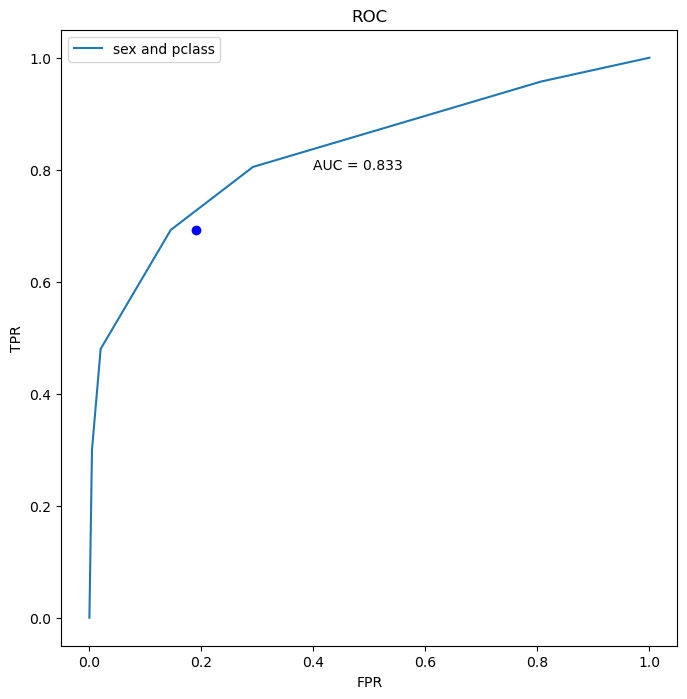

In [41]:
# plot roc curve and auc scores

fig, ax = plt.subplots(figsize=[8,8])
ax.set_aspect(1)
ax.set_xlabel('FPR');
ax.set_ylabel('TPR');
ax.set_title('ROC')
ax.plot(fprs, tprs, label='sex and pclass')
ax.scatter([fpr],[tpr], color='blue', zorder = 5)

ax.text(0.4,0.8,"AUC = {:.3f}".format(auc))
ax.legend();

#### c) Are those features conditionally independent? 

To answer this question we need to compare conditional probability distribution

$$P(sex,pclass|survived)$$

with

$$P(sex|survived)\times P(pclass|survived)$$ 

In [42]:
# 𝑃(𝑠𝑒𝑥|𝑠𝑢𝑟𝑣𝑖𝑣𝑒𝑑)
p_sex_given_survived = p_surv_cond_sex_pclass.xs(1, level='survived').groupby(level='sex').sum()
p_sex_given_survived = p_sex_given_survived.values

In [43]:
# 𝑃(𝑝𝑐𝑙𝑎𝑠𝑠|𝑠𝑢𝑟𝑣𝑖𝑣𝑒𝑑)
p_pclass_given_survived = p_surv_cond_sex_pclass.xs(1, level='survived').groupby(level='pclass').sum()
p_pclass_given_survived = p_pclass_given_survived.values

In [44]:
# 𝑃(𝑠𝑒𝑥|𝑠𝑢𝑟𝑣𝑖𝑣𝑒𝑑)×𝑃(𝑝𝑐𝑙𝑎𝑠𝑠|𝑠𝑢𝑟𝑣𝑖𝑣𝑒𝑑)

import itertools

# cartesian product of P(sex|survived) and P(pclass|survived)
cartesian_product = list(itertools.product(p_sex_given_survived, p_pclass_given_survived))

p_s_sv_x_p_pc_sv = [sex_prob * pclass_prob for sex_prob, pclass_prob in cartesian_product]

p_s_sv_x_p_pc_sv

[3.068412299661807,
 2.360424319964208,
 1.577620095217585,
 0.7729949155838122,
 0.5946384708970867,
 0.39743430583316736]

Please note that $survived$ is actually a label for the survival status: 1 for survived and 0 for dead. 

By definition

which can be calculated based on the `train_counts` object. 

$$P(sex,pclass|survived)= \frac{P(sex,pclass,survived)}{P(survived)}$$

In [45]:
p_s_pc_sv = p_surv_cond_sex_pclass[1, :, :].values

In [46]:
surv = train_counts[1,:,:].values.sum()
total = train_counts[:,:,:].values.sum()
p_s = surv/total

In [47]:
# 𝑃(𝑠𝑒𝑥,𝑝𝑐𝑙𝑎𝑠𝑠|𝑠𝑢𝑟𝑣𝑖𝑣𝑒𝑑)
p_s_pc_given_sv = p_s_pc_sv/p_s
p_s_pc_given_sv 

array([2.55365854, 2.29829268, 1.34028614, 0.84133929, 0.31336268,
       0.40524746])

In [48]:
p_s_sv_x_p_pc_sv

[3.068412299661807,
 2.360424319964208,
 1.577620095217585,
 0.7729949155838122,
 0.5946384708970867,
 0.39743430583316736]

In [52]:
p_s_pc_given_sv = list(p_s_pc_given_sv)
p_s_pc_given_sv

[2.553658536585366,
 2.2982926829268293,
 1.3402861445783134,
 0.8413392857142857,
 0.313362676056338,
 0.405247461928934]

since the arrays are similar, there could be conditional dependency

#### d) Implement a Naive bayes classifier using same features and compare it with a)

In [88]:
from scipy.stats import norm
import scipy.stats as st

# make pdf function for 2 features pclass and sex | survived
def make_pdf(labels, pclass, sex):
        
    positives = labels==1
    negatives = labels==0
    
    pdf_pclass_p = st.norm(*st.norm.fit(pclass[positives])).pdf
    pdf_pclass_n = st.norm(*st.norm.fit(pclass[negatives])).pdf 
    
    pdf_sex_p = st.norm(*st.norm.fit(sex[positives])).pdf
    pdf_sex_n = st.norm(*st.norm.fit(sex[negatives])).pdf                  
                      
    p_p = labels.mean()
    p_n = 1-p_p
            
    def pdf(pclass_input, sex_input):
        p_prod = pdf_pclass_p(pclass_input)*pdf_sex_p(sex_input)*p_p
        n_prod = pdf_pclass_n(pclass_input)*pdf_sex_n(sex_input)*p_n
        
        return p_prod/(p_prod +n_prod)

    return pdf

In [121]:
# classifier with train data

# divide data
X_train = train_data[['pclass', 'sex']]
pclass_train = X_train['pclass']
sex_train = X_train['sex']
sex_train = sex_train.replace('female', 1)
sex_train = sex_train.replace('male', 2)
y_train = train_data['survived']

# make pdf function
pdf_train = make_pdf(y_train, pclass_train, sex_train)

# get fpr and tpr
(_, fpr_train),(_, tpr_train) = confusion_matrix(y_train, pdf_train(pclass_train, sex_train)>0.5, normalize='true' )

# get roc curve and auc score
fprs_train, tprs_train, thds = roc_curve(y_train, pdf_train(pclass_train, sex_train))
auc_train = roc_auc_score(y_train, pdf_train(pclass_train, sex_train))

In [127]:
# classifier with test data

# divide data
X_test = test_data[['pclass', 'sex']]
pclass_test = X_test['pclass']
sex_test = X_test['sex']
sex_test = sex_test.replace('female', 1)
sex_test = sex_test.replace('male', 2)
y_test = test_data['survived']

# make pdf function
pdf_test = make_pdf(y_test, pclass_test, sex_test)

# get fpr and tpr
(_, fpr_test),(_, tpr_test) = confusion_matrix(y_test, pdf_test(pclass_test, sex_test)>0.5, normalize='true')

# get roc curve and auc score
fprs_test, tprs_test, thds = roc_curve(y_test, pdf_test(pclass_test, sex_test))
auc_test = roc_auc_score(y_test, pdf_test(pclass_test, sex_test))

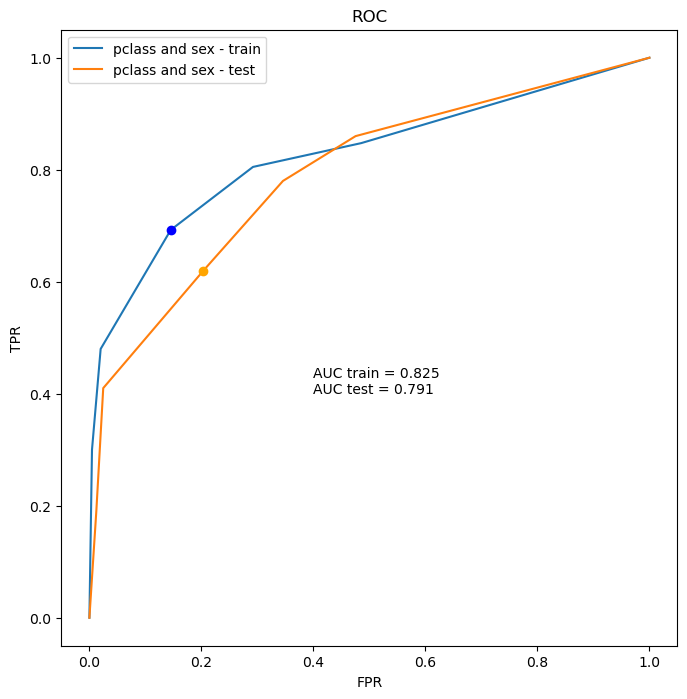

In [128]:
# plot roc curve with auc score

fig, ax = plt.subplots(figsize=[8,8])
ax.set_aspect(1)
ax.set_xlabel('FPR');
ax.set_ylabel('TPR');
ax.set_title('ROC')

ax.plot(fprs_train, tprs_train, label='pclass and sex - train')
ax.scatter([fpr_train],[tpr_train], color='blue', zorder = 5)

ax.plot(fprs_test, tprs_test, label='pclass and sex - test')
ax.scatter([fpr_test],[tpr_test], color='orange', zorder = 5)

ax.text(0.4,0.4,"AUC train = {:.3f}\nAUC test = {:.3f}".format(auc_train, auc_test))
ax.legend();

Please calculate the FPR and TPR as well as AUC and draw the ROC curve for train and test datasets. 

We  have already calculated the probability 

$$P_{NB}(sex,pclass|survived) = P(sex|survived)\times P(pclass|survived)$$

From which we can calculate 

$$P_{NB}(survived|sex,pclass)= \frac{P_{NB}(sex,pclass|survived)P(survived)}{P_{NB}(sex,pclass)}$$

where the denominator is also calculated from the factorised probabilities

$$P_{NB}(sex,pclass)= P_{NB}(sex,pclass|survived=1)P(survived=1)+P_{NB}(sex,pclass|survived=0)P(survived=0)$$

That is very important because the result must be a probability and add up to one

$$P_{NB}(survived=1|sex,pclass)+P_{NB}(survived=0|sex,pclass)=1$$

for each sex and passenger class. 